In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from skimage import io, transform
from keras import regularizers
import matplotlib.pyplot as plt
from skimage import color

import os, glob

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras import layers , optimizers

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
X=np.load("X.npy")
y=np.load("Y.npy")
print("The dataset loaded...")

The dataset loaded...


In [3]:
X.shape

(2062, 64, 64)

In [4]:
#X = X / 255

In [5]:
y.shape

(2062, 10)

In [6]:
def conv_block(model, kernel_size):
    # ,kernel_regularizer=regularizers.l2(0.001),
    model.add(layers.Convolution2D(kernel_size, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.000001)))
    model.add(layers.Convolution2D(kernel_size, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.000001)))
    model.add(layers.Convolution2D(kernel_size, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.000001)))
    model.add(layers.Convolution2D(kernel_size, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.000001)))

    model.add(layers.BatchNormalization())
    return model

In [7]:
# TODO
# ADD SPP
# 
    

In [8]:
def build_conv_model_8():
    model = Sequential()
    model.add(layers.Convolution2D(16, (3, 3), activation='relu', input_shape=(64, 64, 1)))
    model = conv_block(model, 8)
    model.add(layers.MaxPooling2D((2, 2)))
    model = conv_block(model, 16)
    model.add(layers.MaxPooling2D((2, 2)))
    model = conv_block(model, 32)
    
    
    
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.125))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu')) 
    model.add(layers.Dense(10, activation='softmax'))
        
    return model

In [9]:
def split_dataset(X, y, test_size=0.1, random_state=42):
    X_conv=X.reshape(X.shape[0], X.shape[1], X.shape[2],1)
    
    
    return train_test_split(X_conv,y, stratify=y,test_size=test_size,random_state=random_state)

def evaluate_conv_model(model, model_name, X, y, epochs=100,
                        optimizer=optimizers.RMSprop(lr=0.0001), callbacks=None):
    print("[INFO]:Convolutional Model {} created...".format(model_name))
    X_train, X_test, y_train, y_test = split_dataset(X, y)
    
    
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])
    print("[INFO]:Convolutional Model {} compiled...".format(model_name))
    
    print("[INFO]:Convolutional Model {} training....".format(model_name))
    modelHistory=model.fit(X_train, y_train, 
             validation_data=(X_test, y_test),
             callbacks=callbacks,
             epochs=epochs,
             verbose=1
                          )
    print("[INFO]:Convolutional Model {} trained....".format(model_name))

    test_scores=model.evaluate(X_test, y_test, verbose=1)
    train_scores=model.evaluate(X_train, y_train, verbose=1)
    print("[INFO]:Train Accuracy:{:.3f}".format(train_scores[1]))
    print("[INFO]:Validation Accuracy:{:.3f}".format(test_scores[1]))
    
    show_model_history(modelHistory=modelHistory, model_name=model_name)
    return model

In [10]:
def show_model_history(modelHistory, model_name):
    history=pd.DataFrame()
    history["Train Loss"]=modelHistory.history['loss']
    history["Validation Loss"]=modelHistory.history['val_loss']
    history["Train Accuracy"]=modelHistory.history['acc']
    history["Validation Accuracy"]=modelHistory.history['val_acc']
    
    fig, axarr=plt.subplots(nrows=2, ncols=1 ,figsize=(12,8))
    axarr[0].set_title("History of Loss in Train and Validation Datasets")
    history[["Train Loss", "Validation Loss"]].plot(ax=axarr[0])
    axarr[1].set_title("History of Accuracy in Train and Validation Datasets")
    history[["Train Accuracy", "Validation Accuracy"]].plot(ax=axarr[1]) 
    plt.suptitle(" Convulutional Model {} Loss and Accuracy in Train and Validation Datasets".format(model_name))
    plt.show()

In [11]:
trained_models=dict()

W0930 18:26:48.861542 139678890374976 deprecation_wrapper.py:119] From /home/mo5/Desktop/desktop/python/jupyter1.0/jupyter1.0_env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0930 18:26:48.871822 139678890374976 deprecation_wrapper.py:119] From /home/mo5/Desktop/desktop/python/jupyter1.0/jupyter1.0_env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0930 18:26:48.880102 139678890374976 deprecation_wrapper.py:119] From /home/mo5/Desktop/desktop/python/jupyter1.0/jupyter1.0_env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0930 18:26:49.311743 139678890374976 deprecation_wrapper.py:119] From /home/mo5/Desktop/desktop/python/jupyter1.0/jupyter1.0_env/lib/python

[INFO]:Convolutional Model 8 created...
[INFO]:Convolutional Model 8 compiled...
[INFO]:Convolutional Model 8 training....


W0930 18:26:52.137703 139678890374976 deprecation.py:323] From /home/mo5/Desktop/desktop/python/jupyter1.0/jupyter1.0_env/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 1855 samples, validate on 207 samples
Epoch 1/20
1855/1855 [==============================] - 20s 11ms/step - loss: 2.2160 - acc: 0.1908 - val_loss: 2.1380 - val_acc: 0.1981
Epoch 2/20
1855/1855 [==============================] - 18s 10ms/step - loss: 2.0888 - acc: 0.2809 - val_loss: 2.5011 - val_acc: 0.1111
Epoch 3/20
1855/1855 [==============================] - 18s 10ms/step - loss: 1.9703 - acc: 0.3714 - val_loss: 2.8460 - val_acc: 0.1111
Epoch 4/20
1855/1855 [==============================] - 18s 9ms/step - loss: 1.8177 - acc: 0.4469 - val_loss: 1.9499 - val_acc: 0.3285
Epoch 5/20
1855/1855 [==============================] - 18s 10ms/step - loss: 1.6460 - acc: 0.5078 - val_loss: 2.1073 - val_acc: 0.2850
Epoch 6/20
1855/1855 [==============================] - 18s 10ms/step - loss: 1.4714 - acc: 0.5763 - val_loss: 1.8380 - val_acc: 0.3865
Epoch 7/20
1855/1855 [==============================] - 17s 9ms/step - loss: 1.2976 - acc: 0.6383 - val_loss: 1.4627 - val_acc: 0.4928
Epo

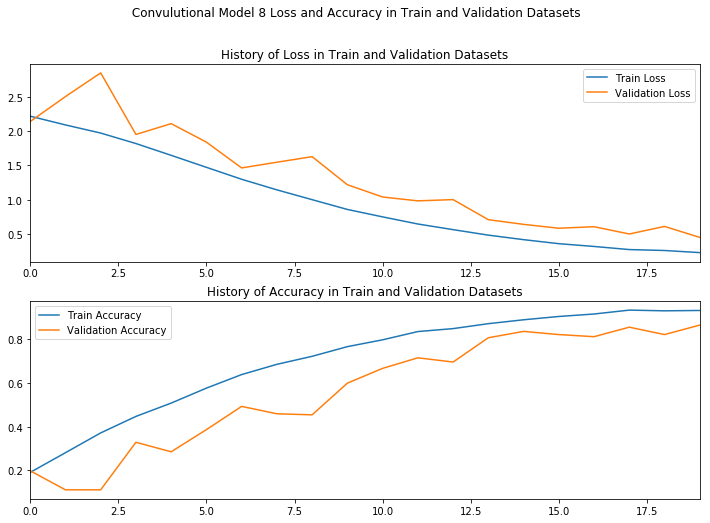

In [12]:
model=build_conv_model_8()
optimizer=optimizers.RMSprop(lr=1e-4)# our default optimizer in evaluate_conv_model function
trained_model_8_2=evaluate_conv_model(model=model, model_name=8, X=X, y=y,optimizer=optimizer, epochs=20)

#Will be used for serialization
#trained_models["model_8_2"]=(trained_model_8_2,optimizer )

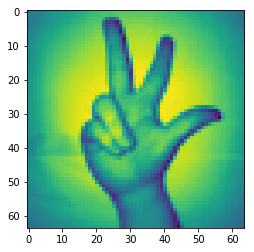

In [13]:
import matplotlib.pyplot as plt

plt.imshow(X[1550])

import matplotlib.pyplot as plt

plt.imshow(img_predict)

from keras.models import model_from_json
json_file = open('model1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_weights1.h5")
print("Loaded model from disk")

optimizer=optimizers.RMSprop(lr=1e-4)
loaded_model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])

1


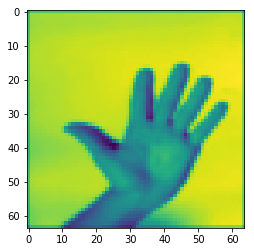

In [18]:
from skimage import color
import numpy as np
img = io.imread("test7.jpg")
img_grey = color.rgb2gray(img)

img_predict = transform.resize(img_grey, (64,64), mode = 'constant')
img_predict =  ( img_predict - img_predict.mean() ) /  img_predict.var() 

plt.imshow(img_predict)
tab = []
tab.append(img_predict)
tab = np.array(tab)
tab = np.expand_dims(tab, axis=3)
tab=trained_model_8_2.predict(tab)
predicted_class = np.argmax(tab[0])
print(predicted_class)

In [ ]:
5 * 60 / 30 

In [ ]:
def SPP_branch(func, bottom, pool_size, filters, kernel_size, strides=1, dilation_rate=1, name=None, reuse=None,
               reg=1e-4, apply_bn=True, apply_relu=True):
    with tf.variable_scope(name):
        size = tf.shape(bottom)[1:3]
        bottom = tf.layers.average_pooling2d(bottom, int(pool_size), int(pool_size), 'same', name='avg_pool')
        bottom = conv_block(func, bottom, filters, kernel_size, strides, dilation_rate, 'conv', reuse, reg,
                            apply_bn, apply_relu)
        bottom = tf.image.resize_images(bottom, size)
    return bottom

In [ ]:

    def SPP(self,bottom, POOL = [2,4,8,16],reuse=False):

        with tf.variable_scope('SPP'):
            # this code supposes H = W
            size = bottom.get_shape().as_list()[1]
            pyramid = [ (size / x) for x in POOL]
            branches = []
            for i, p in enumerate(pyramid):

                branches.append(SPP_branch(tf.layers.conv2d, bottom, p, 32, 3, name='branch_%d' % (i + 1), reuse=reuse,
                                           reg=self.reg))



            with tf.variable_scope('fusion'):
                concat=tf.concat([bottom] + branches,axis=-1,name='concat')

                fusion=conv_block(tf.layers.conv2d,concat,32,1, name='fusion_conv',reuse=reuse,reg=self.reg)

            return fusion